In [10]:
import numpy as np
import pandas as pd
import statsmodels.api as smf
import statsmodels.formula.api as sm

In [11]:
df = pd.read_csv('Greens.csv')

In [12]:
df

,X1,X2,X3,X4,X5,X6
0,231.0,3.0,294,8.2,8.200000,11
1,156.0,2.2,232,6.9,4.100000,12
2,10.0,0.5,149,3.0,4.300000,15
3,519.0,5.5,600,12.0,16.100000,1
4,437.0,4.4,567,10.6,14.100000,5
5,487.0,4.8,571,11.8,12.700000,4
6,299.0,3.1,512,8.1,10.100000,10
7,195.0,2.5,347,7.7,8.400000,12
8,20.0,1.2,212,3.3,2.100000,15
9,68.0,0.6,102,4.9,4.700000,8


In [13]:
fit1 = sm.ols('X1~X5', data=df).fit()

In [14]:
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     X1   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     251.3
Date:                Fri, 31 Mar 2023   Prob (F-statistic):           1.50e-14
Time:                        13:14:02   Log-Likelihood:                -147.33
No. Observations:                  27   AIC:                             298.7
Df Residuals:                      25   BIC:                             301.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -58.8232     24.563     -2.395      0.024    -109.412      -8.235
X5            35.6352      2.248     15.852      0.000      31.005      40.265
==============================================================================
Omnibus:                       13.628   Durbin-Watson:                   2.535
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.236
Skew:                           1.138   Prob(JB):                     0.000298
Kurtosis:                       6.041   Cond. No.                         23.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [16]:
X = add_constant(df)
X

,const,X1,X2,X3,X4,X5,X6
0,1.0,231.0,3.0,294,8.2,8.200000,11
1,1.0,156.0,2.2,232,6.9,4.100000,12
2,1.0,10.0,0.5,149,3.0,4.300000,15
3,1.0,519.0,5.5,600,12.0,16.100000,1
4,1.0,437.0,4.4,567,10.6,14.100000,5
5,1.0,487.0,4.8,571,11.8,12.700000,4
6,1.0,299.0,3.1,512,8.1,10.100000,10
7,1.0,195.0,2.5,347,7.7,8.400000,12
8,1.0,20.0,1.2,212,3.3,2.100000,15
9,1.0,68.0,0.6,102,4.9,4.700000,8


<AxesSubplot:>

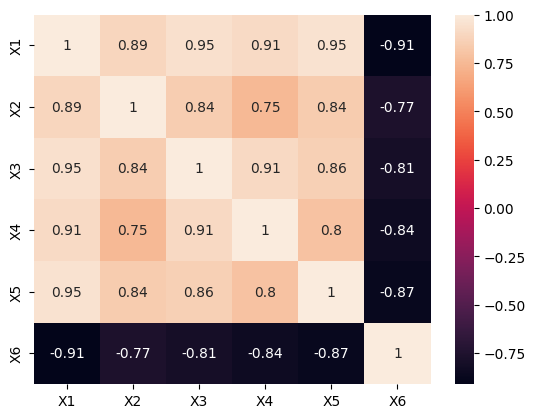

In [19]:
import seaborn as sns
sns.heatmap(X.drop(columns='const').corr(), annot=True)

In [ ]:
vif = pd.DataFrame()
vif['Features'] = df.drop(columns='X1').columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (len(df.drop(columns='X1').columns))]

In [ ]:
vif

,Features,VIF
0,X2,80.262025
1,X3,146.616754
2,X4,8.460403
3,X5,14.552386
4,X6,15.147555


In [ ]:
fit2 = sm.ols('X1~X3+X4+X5+X6', data=df).fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     X1   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     398.7
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           3.51e-20
Time:                        19:49:48   Log-Likelihood:                -121.75
No. Observations:                  27   AIC:                             253.5
Df Residuals:                      22   BIC:                             260.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.6484     41.442     -0.160      0.874     -92.594      79.298
X3             0.2786      0.073      3.815      0.001       0.127       0.430
X4             9.8560      3.458      2.851      0.009       2.685      17.027
X5            15.8108      2.349      6.732      0.000      10.940      20.681
X6            -6.1765      2.339     -2.641      0.015     -11.027      -1.326
==============================================================================
Omnibus:                        5.039   Durbin-Watson:                   1.654
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                4.150
Skew:                           0.960   Prob(JB):                        0.126
Kurtosis:                       2.943   Cond. No.                     3.82e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
vif = pd.DataFrame()
vif['Features'] = df.drop(columns=['X1', 'X2']).columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (len(df.drop(columns=['X1', 'X2']).columns))]

In [ ]:
vif

,Features,VIF
0,X3,80.262025
1,X4,146.616754
2,X5,8.460403
3,X6,14.552386
